In [1]:
using CSV, DataFrames
using Plots, LaTeXStrings
using Measurements, LsqFit
using LinearAlgebra

In [19]:
area = CSV.read("area_variable.csv", DataFrame)

,area_placas,capacitancia,carga_placasuperior,energia_superior
,Int64,Float64,Float64,Float64
1,100,0.3,0.44,0.33
2,120,0.35,0.53,0.4
3,140,0.41,0.62,0.46
4,160,0.47,0.71,0.53
5,180,0.53,0.8,0.6
6,200,0.59,0.89,0.66
7,220,0.65,0.97,0.73
8,240,0.71,1.06,0.8
9,260,0.77,1.15,0.86


In [20]:
function minimos_cuadrados(x, y)
    n = length(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_xy = dot(x, y)
    sum_xx = dot(x, x)
    l = 2
    
    β₀ = ((sum_xx*sum_y)-(sum_xy*sum_x))/((n*sum_xx)-(sum_x^2))
    β₁ = ((n*sum_xy)-(sum_x * sum_y))/((n*sum_xx)-(sum_x^2))
    
    Δ = sum((y - (x.*β₁ .+ β₀)).^2)
    
    σ_Y = sqrt((1/(n-l))*Δ)
    σ_β₁ = σ_Y*sqrt(n/((n*sum_xx) - (sum_x^2)))
    σ_β₀ = σ_Y*sqrt(sum_xx/((n*sum_xx)-(sum_x^2)))
    
    ji_red = sum(((y - (x.*β₁ .+ β₀)).^2)/σ_Y)/(n-l)
    
    return DataFrame("σY" => σ_Y, "β₀" => β₀, "σβ₀" => σ_β₀, "β₁" => β₁, "σ_β₁" => σ_β₁)
end

minimos_cuadrados (generic function with 1 method)

In [21]:
ϵ₀ = BigFloat(8.8541878176e-12)
ϵ₀ = 8.8541878176e-12

8.8541878176e-12

#  Área de la placa variable

### Datos observados

In [55]:
modelo_area = minimos_cuadrados(area.area_placas, area.capacitancia)

,σY,β₀,σβ₀,β₁,σ_β₁
,Float64,Float64,Float64,Float64,Float64
1,0.00315895,0.000367647,0.00228246,0.00294853,8.56592e-6


In [126]:
y_area = regresion.(area.area_placas, modelo_area.β₁[1], modelo_area.β₀[1]) #.± modelo_area.σY[1]

16-element Vector{Float64}:
 0.2952205882352941
 0.35419117647058823
 0.41316176470588234
 0.47213235294117645
 0.5311029411764706
 0.5900735294117647
 0.6490441176470588
 0.7080147058823529
 0.766985294117647
 0.8259558823529412
 0.8849264705882353
 0.9438970588235294
 1.0028676470588236
 1.0618382352941178
 1.1208088235294118
 1.179779411764706

### Modelo teórico

In [127]:
capacitancia(A, d) = (A*ϵ₀)/d
capacitancia(A) = capacitancia(A, 3.)
regresion(x, β₁, β₀) = x*β₁ + β₀

regresion (generic function with 1 method)

In [128]:
areavariable_capacitancia_teorica = capacitancia(area.area_placas)*1e9

16-element Vector{Float64}:
 0.29513959392
 0.35416751270400004
 0.413195431488
 0.472223350272
 0.5312512690560001
 0.59027918784
 0.649307106624
 0.7083350254080001
 0.767362944192
 0.826390862976
 0.88541878176
 0.944446700544
 1.003474619328
 1.0625025381120001
 1.1215304568959998
 1.18055837568

In [129]:
modelo_area_teorico = minimos_cuadrados(area.area_placas, areavariable_capacitancia_teorica)
#y_area_teorico = regresion.(area.area_placas, modelo_area_teorico.β₁[1], modelo_area_teorico.β₀[1])

,σY,β₀,σβ₀,β₁,σ_β₁
,Float64,Float64,Float64,Float64,Float64
1,9.70935e-16,8.55995e-16,7.01536e-16,0.0029514,2.63282e-18


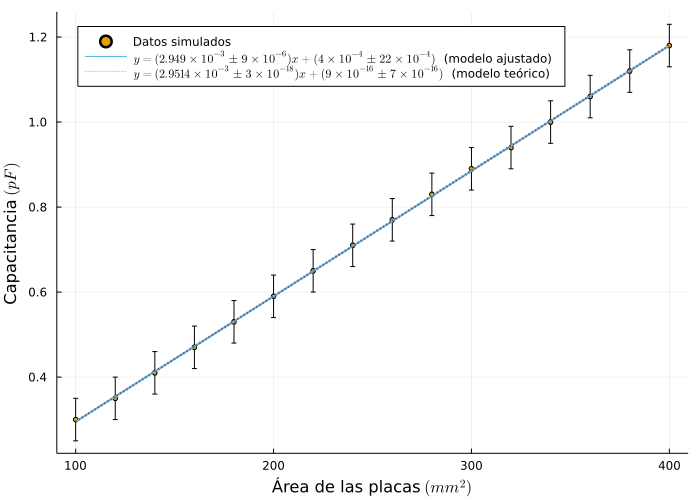

In [165]:
theme(:wong)
p1 = plot(size = (700,500))
scatter!(area.area_placas .± 0.5, area.capacitancia .± 0.05, label = "Datos simulados", markersize = 2.5, legendposition = :topleft)
xlabel!("Área de las placas "* L"(mm^2)")
ylabel!("Capacitancia "*L"(pF)")
plot!(area.area_placas, y_area, label = L"y = (2.949 \times 10^{-3} \pm 9 \times 10^{-6})x + (4 \times 10^{-4} \pm 22 \times 10^{-4}) "*"  (modelo ajustado)", linewidth = 2)
plot!(area.area_placas, areavariable_capacitancia_teorica, label = L"y = (2.9514 \times 10^{-3} \pm 3 \times 10^{-18})x + (9 \times 10^{-16} \pm 7 \times 10^{-16})"*"  (modelo teórico)", line = (:dot), color = :darkred, linewidth = 2.5, linealpha = 0.5)

In [166]:
savefig(p1, "p3_area.pdf")

# Separación entre las placas variable

In [167]:
separacion = CSV.read("separacion_variable.csv", DataFrame)

,separacion_placas,capacitancia,carga_placasuperior,energia_superior
,Float64,Float64,Float64,Float64
1,2.0,1.11,1.66,1.25
2,2.4,0.92,1.38,1.04
3,2.8,0.79,1.19,0.89
4,3.2,0.69,1.04,0.78
5,3.6,0.61,0.92,0.69
6,4.0,0.55,0.83,0.62
7,4.4,0.5,0.75,0.57
8,4.8,0.46,0.69,0.52
9,5.2,0.43,0.64,0.48


In [168]:
modelo_separacion = minimos_cuadrados(1 ./ separacion.separacion_placas, separacion.capacitancia)
display(modelo_separacion)
y_separacion = regresion.(1 ./ separacion.separacion_placas, modelo_separacion.β₁[1], modelo_separacion.β₀[1]) #.± modelo_separacion.σY[1]

,σY,β₀,σβ₀,β₁,σ_β₁
,Float64,Float64,Float64,Float64,Float64
1,0.00306488,0.000689549,0.00144228,2.21064,0.00619511


21-element Vector{Float64}:
 1.1060089729896152
 0.9217890689356456
 0.7902034231828101
 0.6915141888681835
 0.6147558955123628
 0.5533492608277062
 0.5031074688129872
 0.46123930880072134
 0.4258124041749579
 0.3954464859243036
 0.3691293567737365
 0.3461018687669903
 0.32578349699633186
 0.3077227220890799
 0.29156308138259135
 0.27701940474675163
 0.26386084017146805
 0.2518985087393921
 0.24097638004054017
 0.23096442873325917
 0.2217534335305607

In [169]:
capacitancia(d) = capacitancia(250., d)
separacionvariable_capacitancia_teorica = capacitancia.(separacion.separacion_placas)*1e9

modelo_separacion_teorico = minimos_cuadrados(1 ./ separacion.separacion_placas, separacionvariable_capacitancia_teorica)
display(modelo_separacion_teorico)
y_separacion_teorica = regresion.(1 ./ separacion.separacion_placas, modelo_separacion.β₁[1], modelo_separacion.β₀[1]) #.± modelo_separacion.σY[1]

,σY,β₀,σβ₀,β₁,σ_β₁
,Float64,Float64,Float64,Float64,Float64
1,2.88233e-16,0.0,1.35638e-16,2.21355,5.82614e-16


21-element Vector{Float64}:
 1.1060089729896152
 0.9217890689356456
 0.7902034231828101
 0.6915141888681835
 0.6147558955123628
 0.5533492608277062
 0.5031074688129872
 0.46123930880072134
 0.4258124041749579
 0.3954464859243036
 0.3691293567737365
 0.3461018687669903
 0.32578349699633186
 0.3077227220890799
 0.29156308138259135
 0.27701940474675163
 0.26386084017146805
 0.2518985087393921
 0.24097638004054017
 0.23096442873325917
 0.2217534335305607

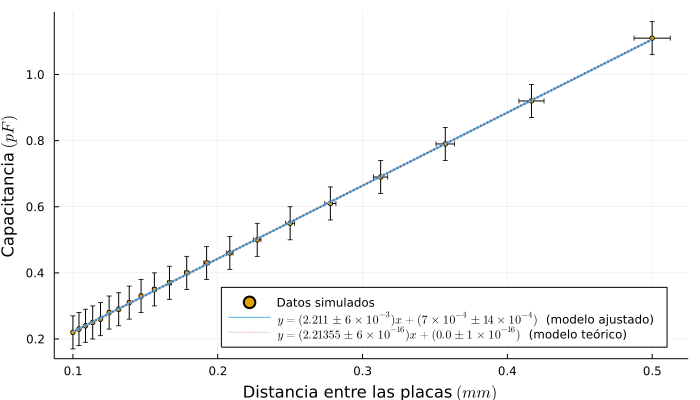

In [199]:
theme(:wong)
p2 = plot(size = (700, 400))
scatter!(1 ./ (separacion.separacion_placas .± 0.05), separacion.capacitancia .± 0.05, label = "Datos simulados", markersize = 2.5, legendposition = :bottomright)
xlabel!("Distancia entre las placas "* L"(mm)")
ylabel!("Capacitancia "*L"(pF)")
plot!(1 ./ separacion.separacion_placas, y_separacion, label = L"y = (2.211 \pm 6 \times 10^{-3})x + (7 \times 10^{-4} \pm 14 \times 10^{-4}) "*"  (modelo ajustado)", linewidth = 2)
plot!(1 ./ separacion.separacion_placas, separacionvariable_capacitancia_teorica, label = L"y = (2.21355 \pm 6 \times 10^{-16})x + (0.0 \pm 1 \times 10^{-16})"*"  (modelo teórico)", line = (:dot), color = :darkred, linewidth = 2.5, linealpha = 0.5)

In [200]:
savefig(p2, "p3_separacion.pdf")

# Diferencia de potencial

In [171]:
diferencia_potencial = CSV.read("diferencia_potencial_variable.csv", DataFrame)

,diferencia_potencial,capacitancia,carga_placasuperior,energia_superior
,Float64,Float64,Float64,Float64
1,1.5,0.74,1.11,0.83
2,1.2,0.74,0.89,0.53
3,0.9,0.74,0.66,0.3
4,0.6,0.74,0.44,0.13
5,0.3,0.74,0.22,0.03
6,0.0,0.74,0.0,0.0
7,-0.3,0.74,0.22,0.03
8,-0.6,0.74,0.44,0.13
9,-0.9,0.74,0.66,0.3


In [172]:
modelo_potencial = minimos_cuadrados(diferencia_potencial., separacion.capacitancia)
display(modelo_potencial)
y_potencial = regresion.(diferencia_potencial.separacion_placas, modelo_separacion.β₁[1], modelo_separacion.β₀[1]) .± modelo_separacion.σY[1]

LoadError: syntax: unexpected ","

# Diélectrico

In [184]:
dielectrico = CSV.read("dielectrico.csv", DataFrame)

,Material,constante_dielectrica,capacitancia,carga_placasuperior(10e13)
,String31,Float64,Float64,Float64
1,Papel,1.5,0.07,9.95
2,Cera,1.8,0.08,11.94
3,Parafina,2.1,0.09,13.93
4,Resina,2.5,0.11,16.58
5,Goma laca,3.1,0.14,20.56
6,Nailon,3.4,0.15,22.55
7,Cuarzo fundido,3.8,0.17,25.21
8,Porcelana,4.4,0.19,29.19
9,Aceite de ricino,4.6,0.2,30.51


In [185]:
modelo_dielectrico = minimos_cuadrados(dielectrico.constante_dielectrica, dielectrico.capacitancia)
display(modelo_dielectrico)
y_dielectrico = regresion.(dielectrico.constante_dielectrica, modelo_dielectrico.β₁[1], modelo_dielectrico.β₀[1]) #.± modelo_dielectrico.σY[1]

,σY,β₀,σβ₀,β₁,σ_β₁
,Float64,Float64,Float64,Float64,Float64
1,0.00252779,0.00307296,0.00234773,0.043145,0.000685545


10-element Vector{Float64}:
 0.06779052662547809
 0.08073403942335983
 0.09367755222124156
 0.11093556928508387
 0.13682259488084733
 0.14976610767872905
 0.16702412474257136
 0.19291115033833486
 0.20154015887025598
 0.2187981759340983

In [186]:
capacitancia_teorica_vacio = capacitancia(250. ± 0.5, 5. ± 0.05) * 1e8

0.04427 ± 0.00045

In [187]:
capacitancia_teorica_dielectrico = capacitancia_teorica_vacio .* (dielectrico.constante_dielectrica .± 0.05)

10-element Vector{Measurement{Float64}}:
 0.0664 ± 0.0023
 0.0797 ± 0.0024
  0.093 ± 0.0024
 0.1107 ± 0.0025
 0.1372 ± 0.0026
 0.1505 ± 0.0027
 0.1682 ± 0.0028
 0.1948 ± 0.003
 0.2036 ± 0.003
 0.2214 ± 0.0032

In [188]:
capacitancia_teorica_dielectrico = capacitancia(250., 5.)*1e8 .* (dielectrico.constante_dielectrica)

10-element Vector{Float64}:
 0.06640640863200001
 0.07968769035840001
 0.09296897208480001
 0.11067734772000001
 0.13723991117280002
 0.15052119289920002
 0.16822956853440002
 0.19479213198720005
 0.2036463198048
 0.22135469544000003

In [189]:
modelo_dielectrico_teorico = minimos_cuadrados(dielectrico.constante_dielectrica, capacitancia_teorica_dielectrico)
display(modelo_dielectrico_teorico)
y_dielectrico_teorico = regresion.(dielectrico.constante_dielectrica, modelo_dielectrico_teorico.β₁[1], modelo_dielectrico_teorico.β₀[1]) .± modelo_dielectrico_teorico.σY[1]

,σY,β₀,σβ₀,β₁,σ_β₁
,Float64,Float64,Float64,Float64,Float64
1,1.66389e-16,2.09045e-16,1.54536e-16,0.0442709,4.51251e-17


10-element Vector{Measurement{Float64}}:
 0.06640640863200019 ± 1.7e-16
 0.07968769035840018 ± 1.7e-16
 0.09296897208480018 ± 1.7e-16
 0.11067734772000017 ± 1.7e-16
 0.13723991117280018 ± 1.7e-16
 0.15052119289920016 ± 1.7e-16
 0.16822956853440016 ± 1.7e-16
 0.19479213198720016 ± 1.7e-16
  0.2036463198048001 ± 1.7e-16
  0.2213546954400001 ± 1.7e-16

In [190]:
#capacitancia_teorica_dielectrico = capacitancia_teorica_vacio .* (dielectrico.constante_dielectrica .± 0.05)

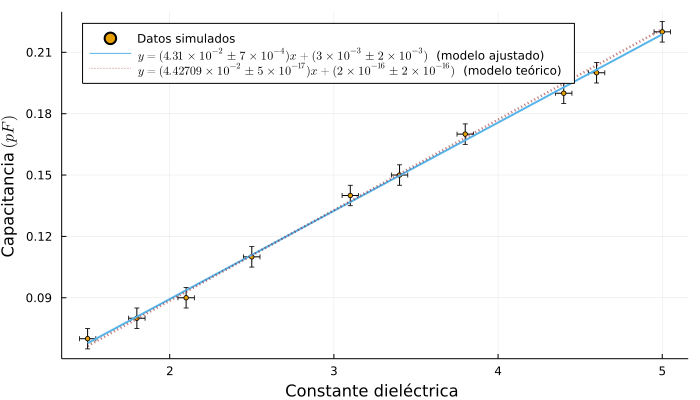

In [191]:
theme(:wong)
p3 = plot(size = (700, 400))
scatter!(dielectrico.constante_dielectrica .± 0.05, dielectrico.capacitancia .± 0.005, label = "Datos simulados", markersize = 2.5, legendposition = :topleft)
xlabel!("Constante dieléctrica ")
ylabel!("Capacitancia "*L"(pF)")
plot!(dielectrico.constante_dielectrica, y_dielectrico, label = L"y = (4.31 \times 10^{-2} \pm 7 \times 10^{-4})x + (3 \times 10^{-3} \pm 2 \times 10^{-3}) "*"  (modelo ajustado)", linewidth = 2)
plot!(dielectrico.constante_dielectrica, capacitancia_teorica_dielectrico, label = L"y = (4.42709 \times 10^{-2} \pm 5 \times 10^{-17})x + (2 \times 10^{-16} \pm 2 \times 10^{-16})"*"  (modelo teórico)", line = (:dot), color = :darkred, linewidth = 2.5, linealpha = 0.5)

In [192]:
savefig(p3, "Downloads\\p3_dielectrico.pdf")